In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import nltk
import itertools
import collections
from nltk import bigrams


import networkx as nx
# from xgboost import XGBClassifier




In [158]:
%pip install networkx

  Using cached networkx-2.6.2-py3-none-any.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [1]:
from platform import python_version

print(python_version())

import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
print(sys.path)

3.8.7
C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\python.exe
3.8.7 (tags/v3.8.7:6503f05, Dec 21 2020, 17:59:51) [MSC v.1928 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=7, releaselevel='final', serial=0)
['C:\\Users\\rishabhstha\\Desktop\\JacksonWater', 'C:\\Users\\rishabhstha\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip', 'C:\\Users\\rishabhstha\\AppData\\Local\\Programs\\Python\\Python38\\DLLs', 'C:\\Users\\rishabhstha\\AppData\\Local\\Programs\\Python\\Python38\\lib', 'C:\\Users\\rishabhstha\\AppData\\Local\\Programs\\Python\\Python38', '', 'C:\\Users\\rishabhstha\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages', 'C:\\Users\\rishabhstha\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32', 'C:\\Users\\rishabhstha\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32\\lib', 'C:\\Users\\rishabhstha\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\Pythonwin', 'C:\\Users\\rishabh

In [142]:
new_path = r'C:\Python39\Scripts'
sys.path.append(new_path)

In [3]:
import snscrape.modules.twitter as sntwitter


tweets_list = []

term='#JacksonWaterCrisis'
geocode = '32.2998,-90.1848'
radius = '50km'
date = "2021-02-10"




#terms=['Jackson water scarcity',Jackson water crisis','Mississippi water','Water for Jackson', 'frozen pipe','water problem','water outage','water crisis', '#JacksonWaterCrisis','JxnWaterCrisis','JxnNeedsWater','JxnWater']

#water geocode:32.2998,-90.1848,50km since:2021-02-10 Jackson water crisis since:2021-02-10

#for term in terms:
#for i,tweet in enumerate(sntwitter.TwitterSearchScraper(term+' geocode:'+geocode+','+radius+' since:'+date).get_items()):
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Jackson water scarcity since:2021-02-10').get_items()):

    if i>10000:
        break

    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.user.location, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount])
    
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username','User Location','Reply Count','Retweet Count','Like Count','Quote Count'])
#tweets_df.drop_duplicates(subset="Tweet Id", keep=False, inplace=True)


tweets_df.to_csv("JWCtweets_Jacksonwaterscarcity.csv")
tweets_df

,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count
0,2021-04-27 23:40:33+00:00,1387189957404643330,Meet the Press Reports delves into the aging w...,TBlackwe85,"Washington, DC/Baltimore, MD",0,0,0,0
1,2021-04-27 23:00:00+00:00,1387179753388404738,"""Meet the Press Reports delves into the aging ...",WaterJusticeHub,Australia,0,1,2,0
2,2021-04-25 11:56:39+00:00,1386288042181238787,Meet the Press Reports delves into the aging w...,TBlackwe85,"Washington, DC/Baltimore, MD",0,0,0,0
3,2021-04-24 18:01:55+00:00,1386017573825830918,"Jackson, Mississippi Suffers Water Crisis As A...",TOTTA_PBBL,"Terra (bicoastal, ex-expat)",1,0,0,0
4,2021-02-28 13:57:41+00:00,1366024777614385153,"People in Jackson, MS in desperate need of hel...",ardnekkisbo,High in middle; round on ends,0,12,7,1


In [4]:
tweets_df['Text']

0    Meet the Press Reports delves into the aging w...
1    "Meet the Press Reports delves into the aging ...
2    Meet the Press Reports delves into the aging w...
3    Jackson, Mississippi Suffers Water Crisis As A...
4    People in Jackson, MS in desperate need of hel...
Name: Text, dtype: object

In [5]:
df1=pd.read_csv("JWCtweets_#Jwatercrisis.csv")
df2=pd.read_csv("JWCtweets_#JxnNeedsWater.csv")
df3=pd.read_csv("JWCtweets_#JxnWater.csv")
df4=pd.read_csv("JWCtweets_frozenpipe.csv")
df5=pd.read_csv("JWCtweets_JacksonMSwaterproblem.csv")
df6=pd.read_csv("JWCtweets_JacksonWaterCrisis.csv")
df7=pd.read_csv("JWCtweets_Jacksonwaterpipeburst.csv")
df8=pd.read_csv("JWCtweets_Jacksonwaterproblem.csv")
df9=pd.read_csv("JWCtweets_Jwcrisis.csv")
df10=pd.read_csv("JWCtweets_JWoutageNoLoc.csv")
df11=pd.read_csv("JWCtweets_MSWater.csv")
df12=pd.read_csv("JWCtweets_MSWaterCrisis.csv")
df13=pd.read_csv("JWCtweets_watercrisis.csv")
df14=pd.read_csv("JWCtweets_wateroutage.csv")
df15=pd.read_csv("JWCtweets_waterpipe.csv")
df16=pd.read_csv("JWCtweets_waterproblem.csv")
df17=pd.read_csv("JWCtweets_watershortage.csv")

dframes=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16]

df_JWC=pd.concat(dframes)

df_JWC

,Unnamed: 0,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count
0,0,2021-05-19 03:03:23+00:00,1394851147563872264,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0
1,1,2021-04-24 02:14:03+00:00,1385779037126148096,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0
2,2,2021-04-21 12:26:37+00:00,1384846032329138176,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0
3,3,2021-04-07 21:13:26+00:00,1379905176711073792,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0
4,4,2021-03-24 17:19:22+00:00,1374772843678949382,#JacksonWaterCrisis https://t.co/Wi1VABjXs2,Backstorymom1,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14,14,2021-02-28 17:40:09+00:00,1366080764719333376,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0
15,15,2021-02-25 00:17:15+00:00,1364731148602134528,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0
16,16,2021-02-24 13:52:51+00:00,1364574012282728449,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0
17,17,2021-02-23 04:58:04+00:00,1364077039641374721,Jackson water outages continue to affect busin...,GaryB_WJTV,"Jackson, MS",0,1,6,0


In [6]:
df_JWC=df_JWC.drop_duplicates(subset="Tweet Id")

In [189]:
#df_JWC.to_csv("JWC_alltweets.csv")
df_JWC=pd.read_csv("JWC_alltweets.csv")

In [190]:
#Timeseries analysis
df_JWC['Datetime']=pd.to_datetime(df_JWC['Datetime'])


In [4]:
df_JWC=df_JWC.set_index(['Datetime'])
df_JWC['Date']=df_JWC.index.date

In [178]:
df_JWC

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count
0,0,0,2021-05-19 03:03:23+00:00,1394851147563872264,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0
1,1,1,2021-04-24 02:14:03+00:00,1385779037126148096,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0
2,2,2,2021-04-21 12:26:37+00:00,1384846032329138176,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0
3,3,3,2021-04-07 21:13:26+00:00,1379905176711073792,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0
4,4,4,2021-03-24 17:19:22+00:00,1374772843678949382,#JacksonWaterCrisis https://t.co/Wi1VABjXs2,Backstorymom1,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4000,13,13,2021-03-02 21:29:35+00:00,1366863278396346369,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0
4001,14,14,2021-02-28 17:40:09+00:00,1366080764719333376,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0
4002,15,15,2021-02-25 00:17:15+00:00,1364731148602134528,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0
4003,16,16,2021-02-24 13:52:51+00:00,1364574012282728449,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0


<ipython-input-133-3d9eb4973adf>:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Text(0, 0.5, 'Number of tweets')

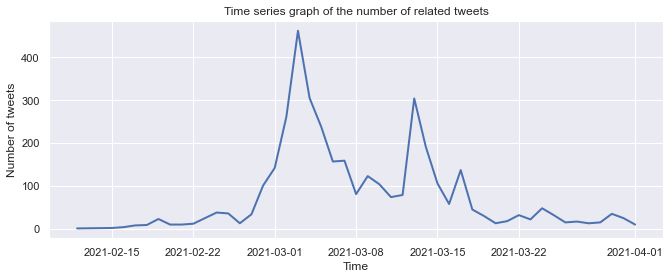

In [133]:
df_JWC_plot=df_JWC.loc['2021-02-10':'2021-04-01']
df_JWC_plot=df_JWC_plot.groupby('Date').count()
sns.set(rc={'figure.figsize':(11, 4)})
df_JWC_plot['Text'].plot(linewidth=2)
plt.title("Time series graph of the number of related tweets")
plt.xlabel("Time")
plt.ylabel("Number of tweets")

In [7]:
#Number of tweets in Feb
df_JWC_Feb=df_JWC.loc['2021-02-10':'2021-02-28']
df_JWC_Feb

<ipython-input-7-77c22dbfeec9>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_JWC_Feb=df_JWC.loc['2021-02-10':'2021-02-28']


,Unnamed: 0,Unnamed: 0.1,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date
Datetime,,,,,,,,,,,
2021-02-28 23:19:12+00:00,143,143,1366166087977558017,@cindyhydesmith @RogerWicker @RepMichaelGuest ...,MarkHutch1965,"Jackson, MS",0,0,0,0,2021-02-28
2021-02-28 22:35:32+00:00,144,144,1366155102264901633,"Jackson, Mississippi residents have been witho...",TragicalExpress,"Florida, USA",1,0,1,0,2021-02-28
2021-02-28 18:23:04+00:00,145,145,1366091563370237953,"11 days. No safe, running, flushable water. Ja...",HeadedToTherapy,NaN,0,2,0,0,2021-02-28
2021-02-28 17:51:22+00:00,146,146,1366083588001730562,#JacksonMSWaterCrisis #JacksonWaterCrisis http...,HeadedToTherapy,NaN,0,1,0,0,2021-02-28
2021-02-28 17:48:49+00:00,147,147,1366082946432655365,#JacksonWaterCrisis https://t.co/ocrrH14axZ,HeadedToTherapy,NaN,0,0,0,0,2021-02-28
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-17 00:14:27+00:00,7,7,1361831337011912706,@D_Ison92 Scattered outages in town. They’ve b...,CharleyDumas,"Prentiss, MS",1,0,0,0,2021-02-17
2021-02-28 17:40:09+00:00,14,14,1366080764719333376,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2021-02-28
2021-02-25 00:17:15+00:00,15,15,1364731148602134528,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2021-02-25


In [8]:
#Number of tweets in March
df_JWC_March=df_JWC.loc['2021-03-01':'2021-03-31']
df_JWC_March

<ipython-input-8-ae7ac34cadf8>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_JWC_March=df_JWC.loc['2021-03-01':'2021-03-31']


,Unnamed: 0,Unnamed: 0.1,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date
Datetime,,,,,,,,,,,
2021-03-24 17:19:22+00:00,4,4,1374772843678949382,#JacksonWaterCrisis https://t.co/Wi1VABjXs2,Backstorymom1,NaN,0,0,0,0,2021-03-24
2021-03-22 23:57:03+00:00,5,5,1374148148172496899,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,2021-03-22
2021-03-20 21:42:07+00:00,6,6,1373389416320925702,Another secession from the union?!? \n#Jackson...,Backstorymom1,NaN,1,0,0,0,2021-03-20
2021-03-19 21:14:20+00:00,7,7,1373020035875274758,#JacksonWaterCrisis https://t.co/byqOHfxP85,Backstorymom1,NaN,0,0,0,0,2021-03-19
2021-03-18 04:34:49+00:00,8,8,1372406111425470471,#JacksonWaterCrisis https://t.co/siefRNSVT9,Monicadisaster1,"Pennsylvania, USA",0,0,0,0,2021-03-18
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 21:45:11+00:00,20,20,1366867205204422666,Emergency has been declared at the state level...,keeganfoxx,"Jackson, MS",0,8,5,0,2021-03-02
2021-03-02 12:28:46+00:00,22,22,1366727177828507649,"@Elise_Jordan - hey, thank you for spreading t...",BoiJuanda,"Jackson, MS",1,0,0,0,2021-03-02
2021-03-23 23:22:22+00:00,4,4,1374501805674033152,@tarasynora2 I dont do much to dump anything t...,Paganveteran,south Mississippi,1,0,1,0,2021-03-23


In [9]:
#Number of tweets in April
df_JWC_April=df_JWC.loc['2021-04-01':'2021-04-30']
df_JWC_April

<ipython-input-9-3a5d64f4911f>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_JWC_April=df_JWC.loc['2021-04-01':'2021-04-30']


,Unnamed: 0,Unnamed: 0.1,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date
Datetime,,,,,,,,,,,
2021-04-24 02:14:03+00:00,1,1,1385779037126148096,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,2021-04-24
2021-04-21 12:26:37+00:00,2,2,1384846032329138176,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,2021-04-21
2021-04-07 21:13:26+00:00,3,3,1379905176711073792,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,2021-04-07
2021-04-30 02:33:48+00:00,0,0,1387958334041563140,@RepLawrence @SafeH2o4Schools @POTUS I would l...,chefcarney,"Biloxi, MS",1,0,0,0,2021-04-30
2021-04-29 15:09:37+00:00,1,1,1387786155530194946,Welcome newcomers! \n\nAlso: #FreeBritney #Fre...,tsalibian,"Los Angeles, CA",0,0,6,0,2021-04-29
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-07 18:01:50+00:00,98,98,1379856958631518209,LIVE w/ Jordan Chariton - The Water Crisis In ...,RonPlacone,"Los Angeles, CA",0,9,16,1,2021-04-07
2021-04-07 17:57:19+00:00,99,99,1379855825015988226,LIVE w/ Jordan Chariton - The Water Crisis In ...,coedv,"Corona, CA",0,0,0,0,2021-04-07
2021-04-07 16:52:26+00:00,100,100,1379839496980586496,#GetYourNewsOnWithRon starts at 2pm ET/11am PT...,RonPlacone,"Los Angeles, CA",1,2,6,0,2021-04-07


In [10]:
df_JWC_plot

,Unnamed: 0,Unnamed: 0.1,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count
Date,,,,,,,,,,
2021-02-12,1,1,1,1,1,1,1,1,1,1
2021-02-15,2,2,2,2,2,1,2,2,2,2
2021-02-16,4,4,4,4,4,4,4,4,4,4
2021-02-17,8,8,8,8,8,6,8,8,8,8
2021-02-18,9,9,9,9,9,8,9,9,9,9
2021-02-19,23,23,23,23,23,20,23,23,23,23
2021-02-20,10,10,10,10,10,7,10,10,10,10
2021-02-21,10,10,10,10,10,9,10,10,10,10
2021-02-22,12,12,12,12,12,11,12,12,12,12


There are 659717 words in the combination of all tweets


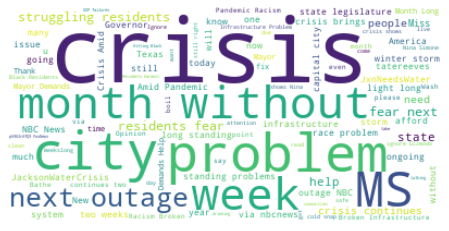

In [11]:
#Generate wordclouds

text = " ".join(review for review in df_JWC['Text'])
print ("There are {} words in the combination of all tweets".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["https",'t','co','amp','water','Jackson','Mississippi','s','M'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0, 0.5, 'Number of tweets')

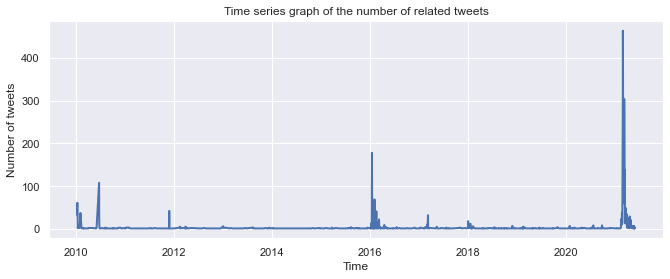

In [182]:
#Time series graph for tweets since 2010.(?? Merge with original tweet file and then create a graph to see real number of 2021 JWC)

df18=pd.read_csv("JWCtweets_Jacksonwatercrisis2010.csv")
df19=pd.read_csv("JWCtweets_Jacksonwaterproblem2010.csv")
df20=pd.read_csv("JWCtweets_#Jacksonwatercrisis2010.csv")
dframes=[df18,df19,df20,df_JWC]
df_JWC2010=pd.concat(dframes)

df_JWC2010=df_JWC2010.drop_duplicates(subset="Tweet Id")

df_JWC2010['Datetime']=pd.to_datetime(df_JWC2010['Datetime'])
df_JWC2010=df_JWC2010.set_index(['Datetime'])
df_JWC2010['Date']=df_JWC2010.index.date

df_JWC_plot=df_JWC2010.groupby('Date').count()
sns.set(rc={'figure.figsize':(11, 4)})
df_JWC_plot['Text'].plot(linewidth=2)
plt.title("Time series graph of the number of related tweets")
plt.xlabel("Time")
plt.ylabel("Number of tweets")

In [185]:
df_JWC2010.loc['2021-02-10':'2021-06-01']


<ipython-input-185-27db35ec5b87>:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



,Unnamed: 0,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Unnamed: 0.1,Date
Datetime,,,,,,,,,,,
2021-05-21 12:59:20+00:00,0,1395725901351071747,You're holding up the Special Session. No les...,brown60076,Hell,0,0,0,0,NaN,2021-05-21
2021-05-18 04:27:03+00:00,1,1394509814001246217,I'm reposting this podcast that gives more con...,smartstatistic,"Jackson, MS",0,1,6,0,NaN,2021-05-18
2021-05-16 23:36:23+00:00,2,1394074280187547648,"@SenatorWicker Search for ...\n""Mississippi Ri...",gibu02,NaN,0,0,0,0,NaN,2021-05-16
2021-05-16 23:34:11+00:00,3,1394073725633548301,@bardaffy160 @SenatorWicker @All100Senators Lo...,gibu02,NaN,0,0,0,0,NaN,2021-05-16
2021-05-16 06:03:33+00:00,4,1393809324871360513,@SallieAnn9 @ashtonpittman @SenatorWicker @cin...,4SeasonsTL,The Right Side of History,1,2,4,0,NaN,2021-05-16
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 21:29:35+00:00,13,1366863278396346369,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,13.0,2021-03-02
2021-02-28 17:40:09+00:00,14,1366080764719333376,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,14.0,2021-02-28
2021-02-25 00:17:15+00:00,15,1364731148602134528,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,15.0,2021-02-25


# Sentiment Analysis

In [14]:
analyzer=SentimentIntensityAnalyzer()
df_JWC['compound']=[analyzer.polarity_scores(tweet)['compound'] for tweet in df_JWC['Text']]

In [15]:
#df_JWC.to_csv("JWC_alltweets_sentimentScore.csv")
df_JWC

,Unnamed: 0,Unnamed: 0.1,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound
Datetime,,,,,,,,,,,,
2021-05-19 03:03:23+00:00,0,0,1394851147563872264,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,2021-05-19,-0.4648
2021-04-24 02:14:03+00:00,1,1,1385779037126148096,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,2021-04-24,0.0000
2021-04-21 12:26:37+00:00,2,2,1384846032329138176,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,2021-04-21,0.3400
2021-04-07 21:13:26+00:00,3,3,1379905176711073792,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,2021-04-07,0.0000
2021-03-24 17:19:22+00:00,4,4,1374772843678949382,#JacksonWaterCrisis https://t.co/Wi1VABjXs2,Backstorymom1,NaN,0,0,0,0,2021-03-24,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 21:29:35+00:00,13,13,1366863278396346369,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,2021-03-02,0.5413
2021-02-28 17:40:09+00:00,14,14,1366080764719333376,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2021-02-28,-0.2124
2021-02-25 00:17:15+00:00,15,15,1364731148602134528,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2021-02-25,0.3584


In [16]:
#Average compound score of all the tweets
df_JWC['compound'].mean()

-0.49743253433208495

In [17]:
#Average compound score by month
df_JWC['Month']=df_JWC.index.month
df_JWC_avgMonthScore=df_JWC.groupby('Month').mean()

df_JWC_avgMonthScore['compound']

Month
2   -0.306506
3   -0.525020
4   -0.433988
5   -0.334172
Name: compound, dtype: float64

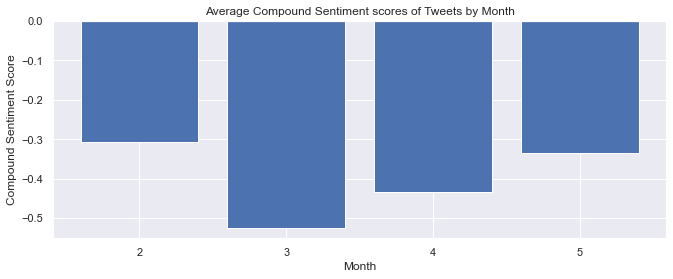

In [18]:
#bar chart of average compound score by month
newplot=df_JWC_avgMonthScore.reset_index()
x_month=[2,3,4,5]
plt.bar(newplot['Month'],newplot['compound'])
plt.xticks(x_month)
plt.title("Average Compound Sentiment scores of Tweets by Month")
plt.xlabel("Month")
plt.ylabel("Compound Sentiment Score")
plt.show()

In [19]:
#Number of tweets by month
df_JWC_numTweetMonth=df_JWC.groupby('Month').count()

df_JWC_numTweetMonth['Text']

Month
2     326
3    3341
4     253
5      85
Name: Text, dtype: int64

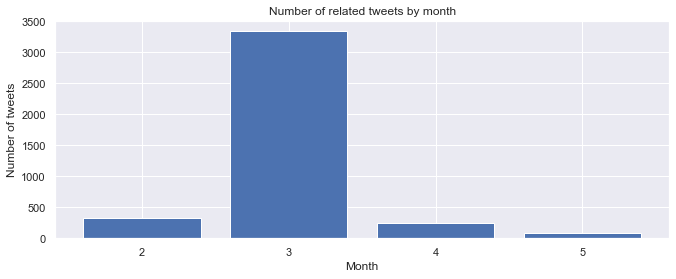

In [20]:
#bar chart of number of tweets by month
newplot=df_JWC_numTweetMonth.reset_index()
x_month=[2,3,4,5]
plt.bar(newplot['Month'],newplot['Text'])
plt.xticks(x_month)
plt.title("Number of related tweets by month")
plt.xlabel("Month")
plt.ylabel("Number of tweets")
plt.show()

In [21]:
#Find a correlation between number of tweets and compound scores of month- the more number of tweets more negative average compound score 


<ipython-input-22-96c4940e7d11>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_JWC2010_plot=df_JWC2010.loc['2010-01-01':'2020-12-31']


There are 296449 words in the combination of all tweets


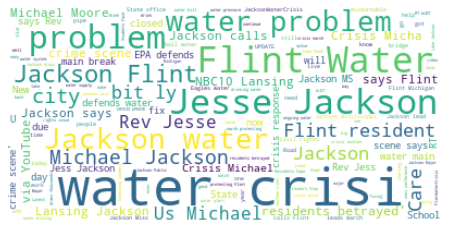

In [22]:
#Wordcloud of 2010 and 2016 tweets
df_JWC2010_plot=df_JWC2010.loc['2010-01-01':'2020-12-31']

text = " ".join(review for review in df_JWC2010_plot['Text'])
print ("There are {} words in the combination of all tweets".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["https",'t','co','amp','s','M'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
#Ratio of negative tweets against all tweets
df_JWC_positiveScore=df_JWC[df_JWC['compound']>0]
df_JWC_negativeScore=df_JWC[df_JWC['compound']<0]
df_JWC_neutralScore=df_JWC[df_JWC['compound']==0]
df_JWC_negativeScore

,Unnamed: 0,Unnamed: 0.1,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month
Datetime,,,,,,,,,,,,,
2021-05-19 03:03:23+00:00,0,0,1394851147563872264,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,2021-05-19,-0.4648,5
2021-03-22 23:57:03+00:00,5,5,1374148148172496899,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,2021-03-22,-0.8481,3
2021-03-17 16:52:40+00:00,15,15,1372229409713881091,We must demand equitable access to water for #...,MaSs20y8,"Connecticut, USA",0,0,1,0,2021-03-17,-0.1280,3
2021-03-17 15:33:10+00:00,16,16,1372209402392969227,This city has participatory budgeting as it ap...,odaraia,Salish Sea,0,0,0,0,2021-03-17,-0.4767,3
2021-03-15 15:35:23+00:00,24,24,1371485184382566408,"Racial disparities run deep in the US, includi...",n_timmerman,"Edmond, OK",0,1,1,1,2021-03-15,-0.5719,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-22 02:46:41+00:00,1,1,1395934111278194688,A local crime spree and ongoing water problems...,WLBT,"Jackson, MS",1,0,1,0,2021-05-22,-0.7351,5
2021-03-23 23:22:22+00:00,4,4,1374501805674033152,@tarasynora2 I dont do much to dump anything t...,Paganveteran,south Mississippi,1,0,1,0,2021-03-23,-0.3506,3
2021-03-04 20:20:40+00:00,10,10,1367570709493534729,"@MeetThePress @HowardAuthor Basically, this wa...",MorganRadford,NYC,1,5,22,2,2021-03-04,-0.6705,3


In [24]:
#Number of negative scores by month
df_JWC_numNegScore=df_JWC_negativeScore.groupby('Month').count()
df_JWC_numNegScore['Text']

Month
2     234
3    2858
4     199
5      64
Name: Text, dtype: int64

In [25]:
#Average negative score by month

df_JWC_negAvgMonthScore=df_JWC_negativeScore.groupby('Month').mean()

df_JWC_negAvgMonthScore['compound']



Month
2   -0.547929
3   -0.661005
4   -0.652949
5   -0.577903
Name: compound, dtype: float64

In [26]:
df_JWC

,Unnamed: 0,Unnamed: 0.1,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month
Datetime,,,,,,,,,,,,,
2021-05-19 03:03:23+00:00,0,0,1394851147563872264,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,2021-05-19,-0.4648,5
2021-04-24 02:14:03+00:00,1,1,1385779037126148096,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,2021-04-24,0.0000,4
2021-04-21 12:26:37+00:00,2,2,1384846032329138176,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,2021-04-21,0.3400,4
2021-04-07 21:13:26+00:00,3,3,1379905176711073792,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,2021-04-07,0.0000,4
2021-03-24 17:19:22+00:00,4,4,1374772843678949382,#JacksonWaterCrisis https://t.co/Wi1VABjXs2,Backstorymom1,NaN,0,0,0,0,2021-03-24,0.0000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 21:29:35+00:00,13,13,1366863278396346369,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,2021-03-02,0.5413,3
2021-02-28 17:40:09+00:00,14,14,1366080764719333376,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2021-02-28,-0.2124,2
2021-02-25 00:17:15+00:00,15,15,1364731148602134528,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2021-02-25,0.3584,2


In [27]:
#Common words in positive, negative and neutral tweets

import plotly.express as px
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df_JWC['Clean Tweet']=df_JWC['Text'].apply(lambda x:clean_text(x))


def remove_stopwords(x):
    stopword=stopwords.words('english')
    stopword.append("amp")
    stopword.append("t")
    stopword.append("co")
   
    return [y for y in x if y not in stopword]

def common_words(df):
    df['word list']=df['Clean Tweet'].apply(lambda x:str(x).split())
    

    
    
    df['word list']=df['word list'].apply(lambda x:remove_stopwords(x))
    
    top = Counter([item for sublist in df['word list'] for item in sublist])
    tweet_positive = pd.DataFrame(top.most_common(20))
    tweet_positive.columns = ['Common words','count']
#     tweet_positive.style.background_gradient(cmap='Greens')
    return tweet_positive
    
    
    
   
    
df_JWC_positive=df_JWC[df_JWC['compound']>0]
df_JWC_negative=df_JWC[df_JWC['compound']<0]
df_JWC_neutral=df_JWC[df_JWC['compound']==0]

common_positive=common_words(df_JWC_positive)
print(common_positive)

common_negative=common_words(df_JWC_negative)
print(common_negative)

common_neutral=common_words(df_JWC_neutral)
print(common_neutral)

<ipython-input-27-314088cfd22d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word list']=df['Clean Tweet'].apply(lambda x:str(x).split())
<ipython-input-27-314088cfd22d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word list']=df['word list'].apply(lambda x:remove_stopwords(x))
<ipython-input-27-314088cfd22d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

          Common words  count
0                water    473
1              jackson    332
2          mississippi    184
3               crisis    178
4                 help    121
5                 city     73
6                   ms     68
7        jxnneedswater     60
8               people     58
9            residents     51
10            problems     49
11              please     47
12  jacksonwatercrisis     45
13               weeks     42
14                like     42
15             without     41
16               state     41
17             problem     40
18               still     36
19               clean     36
      Common words  count
0            water   4043
1          jackson   2914
2           crisis   2646
3      mississippi   2071
4             city    572
5        residents    544
6              via    456
7            month    439
8          without    437
9            weeks    379
10  infrastructure    371
11         problem    359
12           state    354
13    

<ipython-input-27-314088cfd22d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word list']=df['word list'].apply(lambda x:remove_stopwords(x))
<ipython-input-27-314088cfd22d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word list']=df['Clean Tweet'].apply(lambda x:str(x).split())
<ipython-input-27-314088cfd22d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [30]:

fig = px.bar(common_positive, x="count", y="Common words", title='Most Commmon Words in Positive Tweets', orientation='h', 
             width=700, height=700,color='Common words')
fig.show()

fig = px.bar(common_negative, x="count", y="Common words", title='Most Commmon Words in Negative Tweets', orientation='h', 
             width=700, height=700,color='Common words')
fig.show()

fig = px.bar(common_neutral, x="count", y="Common words", title='Most Commmon Words in Neutral Tweets', orientation='h', 
             width=700, height=700,color='Common words')
fig.show()

#fig = px.treemap(temp, path=['Common_words'], values='count',title='Most Common Words')
#fig.show()

In [31]:
#Dropping retweets based on same words in the clean tweets
df_JWC1=df_JWC.drop_duplicates(subset="Clean Tweet")
df_JWC1

,Unnamed: 0,Unnamed: 0.1,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month,Clean Tweet
Datetime,,,,,,,,,,,,,,
2021-05-19 03:03:23+00:00,0,0,1394851147563872264,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,2021-05-19,-0.4648,5,water issues in the city again smh jacksonwate...
2021-04-24 02:14:03+00:00,1,1,1385779037126148096,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,2021-04-24,0.0000,4,jacksonwatercrisis
2021-04-21 12:26:37+00:00,2,2,1384846032329138176,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,2021-04-21,0.3400,4,anyone with mobile video of the jacksonwatercr...
2021-04-07 21:13:26+00:00,3,3,1379905176711073792,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,2021-04-07,0.0000,4,flintwatercrisis jacksonwatercrisis
2021-03-22 23:57:03+00:00,5,5,1374148148172496899,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,2021-03-22,-0.8481,3,jackson mississippi s water crisis is rooted i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 21:29:35+00:00,13,13,1366863278396346369,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,2021-03-02,0.5413,3,governor we ll have to have a serious conversa...
2021-02-28 17:40:09+00:00,14,14,1366080764719333376,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2021-02-28,-0.2124,2,hindseoc you nincompoops should fix the broke...
2021-02-25 00:17:15+00:00,15,15,1364731148602134528,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2021-02-25,0.3584,2,kaylahazel our north been complaining about w...


In [39]:
#df_JWC1.to_csv("JWC_alltweets1.csv")

In [32]:
#Checking for duplicate retweets values

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df_JWC['Clean Tweet']=df_JWC['Text'].apply(lambda x:clean_text(x))

df_JWC.drop_duplicates(subset='Clean Tweet')
df_JWC

duplicate=df_JWC[df_JWC.duplicated('Clean Tweet')]
duplicate.to_csv("duplicatetweets.csv")

In [33]:
#For mapping the location of tweets

In [191]:
df_JWC

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count
0,0,0,2021-05-19 03:03:23+00:00,1394851147563872264,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0
1,1,1,2021-04-24 02:14:03+00:00,1385779037126148096,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0
2,2,2,2021-04-21 12:26:37+00:00,1384846032329138176,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0
3,3,3,2021-04-07 21:13:26+00:00,1379905176711073792,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0
4,4,4,2021-03-24 17:19:22+00:00,1374772843678949382,#JacksonWaterCrisis https://t.co/Wi1VABjXs2,Backstorymom1,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4000,13,13,2021-03-02 21:29:35+00:00,1366863278396346369,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0
4001,14,14,2021-02-28 17:40:09+00:00,1366080764719333376,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0
4002,15,15,2021-02-25 00:17:15+00:00,1364731148602134528,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0
4003,16,16,2021-02-24 13:52:51+00:00,1364574012282728449,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0


In [198]:
#location with 10+ tweets
locs=df_JWC['User Location'].value_counts()
locs=locs[locs>=10]

In [200]:
#Counting the tweets having location

df_JWC['User Location'].value_counts()

Jackson, MS            512
USA                    137
Los Angeles, CA        124
New York, NY           118
Washington, DC          53
                      ... 
NY                       1
North Kansas City        1
Epicenter, Universe      1
Bodfish, CA              1
Denver, Colorado         1
Name: User Location, Length: 1186, dtype: int64

In [196]:
# map these entries so we can group similar entries together.
#try to find as much group as you can
mapping={'Jackson':'Jackson, MS', 'Jackson, Mississippi':'Jackson, MS', 'Mississippi, USA': 'Jackson, MS','Mississippi':'Jackson, MS','United States':'USA','Los Angeles': 'Los Angeles, CA','New York City':'New York, NY','NYC':'New York, NY','New York':'New York, NY','New York, USA':'New York, NY','Mississippi State, MS':'Jackson, MS',
        'Hattiesburg, Mississippi':'Hattiesburg, MS'}

df_JWC['User Location'] =  df_JWC['User Location'].apply(lambda x: mapping[x] if x in mapping.keys() else x )

In [199]:
locs

Jackson, MS          512
USA                  137
Los Angeles, CA      124
New York, NY         118
Washington, DC        53
Hattiesburg, MS       31
Chicago, IL           25
California, USA       25
Pennsylvania, USA     24
Atlanta, GA           23
Houston, TX           18
Washington, D.C.      17
Biloxi, MS            16
Earth                 15
Florida, USA          14
Portland, OR          12
Snellville, GA        11
Austin, TX            11
New Orleans, LA       10
Chicago               10
Boston, MA            10
Name: User Location, dtype: int64

In [14]:
%pip install geopy

You should consider upgrading via the 'C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [201]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='twitter-analysis-cl')
#note that user_agent is a random name
locs = list(locs.index) #keep only the city names




In [202]:
locs

['Jackson, MS',
 'USA',
 'Los Angeles, CA',
 'New York, NY',
 'Washington, DC',
 'Hattiesburg, MS',
 'Chicago, IL',
 'California, USA',
 'Pennsylvania, USA',
 'Atlanta, GA',
 'Houston, TX',
 'Washington, D.C.',
 'Biloxi, MS ',
 'Earth',
 'Florida, USA',
 'Portland, OR',
 'Snellville, GA',
 'Austin, TX',
 'New Orleans, LA',
 'Chicago',
 'Boston, MA']

In [205]:
from geopy.exc import GeocoderTimedOut

geolocated = list(map(lambda x: [x,geolocator.geocode(x)[1] if geolocator.geocode(x) else None],locs))



geolocated = pd.DataFrame(geolocated)
geolocated.columns = ['locat','latlong']
geolocated['lat'] = geolocated.latlong.apply(lambda x: x[0])
geolocated['long'] = geolocated.latlong.apply(lambda x: x[1])
geolocated.drop('latlong',axis=1, inplace=True) 

In [206]:
geolocated

,locat,lat,long
0,"Jackson, MS",32.299038,-90.184769
1,USA,39.783730,-100.445882
2,"Los Angeles, CA",34.053691,-118.242766
3,"New York, NY",40.712728,-74.006015
4,"Washington, DC",38.894992,-77.036558
5,"Hattiesburg, MS",31.327119,-89.290339
6,"Chicago, IL",41.875562,-87.624421
7,"California, USA",36.701463,-118.755997
8,"Pennsylvania, USA",40.969989,-77.727883
9,"Atlanta, GA",33.784959,-84.442163


In [207]:
#plotting on a map
mapdata = pd.merge(df_JWC,geolocated, how='inner', left_on='User Location', right_on='locat')
locations = mapdata.groupby(by=['locat','lat','long']).count()

In [208]:
#mapdata.to_csv("mapdata.csv")
mapdata

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,locat,lat,long
0,2,2,2021-04-21 12:26:37+00:00,1384846032329138176,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,"New York, NY",40.712728,-74.006015
1,20,20,2021-03-17 12:24:29+00:00,1372161919440814082,Well water boil water notice was lifted here i...,Ginger_Zee,"New York, NY",4,9,39,0,"New York, NY",40.712728,-74.006015
2,43,43,2021-03-06 15:00:14+00:00,1368214845632430080,While Jackson residents and organizers say the...,newsone,"New York, NY",1,4,12,0,"New York, NY",40.712728,-74.006015
3,81,81,2021-03-03 18:30:00+00:00,1367180474838380553,While Jackson residents and organizers say the...,newsone,"New York, NY",0,1,5,0,"New York, NY",40.712728,-74.006015
4,149,149,2021-02-28 09:03:46+00:00,1365950811092705281,#JacksonWaterCrisis\n@jaketapper @andersoncoop...,00Lilac_Sky00,"New York, NY",0,0,0,0,"New York, NY",40.712728,-74.006015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,957,957,2021-03-05 11:52:00+00:00,1367805088098525184,The water crisis in Mississippi America can’t ...,ohyeslawd,"California, USA",0,0,0,0,"California, USA",36.701463,-118.755997
1212,989,989,2021-03-05 07:59:32+00:00,1367746586915139585,The water crisis in Mississippi America can’t ...,Fiesta_ANovel,"California, USA",0,0,0,0,"California, USA",36.701463,-118.755997
1213,1007,1007,2021-03-05 04:50:32+00:00,1367699022463442947,The water crisis in Mississippi America can’t ...,scbhardwaj,"California, USA",0,1,0,0,"California, USA",36.701463,-118.755997
1214,1205,1205,2021-03-03 23:43:05+00:00,1367259261487640577,"Weeks after storms, water crisis continues in ...",Fiesta_ANovel,"California, USA",0,0,1,0,"California, USA",36.701463,-118.755997


In [209]:
locations

,,,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count
locat,lat,long,,,,,,,,,,,
"Atlanta, GA",33.784959,-84.442163,23,23,23,23,23,23,23,23,23,23,23
"Austin, TX",30.271129,-97.743700,11,11,11,11,11,11,11,11,11,11,11
"Biloxi, MS",30.374673,-88.845943,16,16,16,16,16,16,16,16,16,16,16
"Boston, MA",42.360253,-71.058291,10,10,10,10,10,10,10,10,10,10,10
"California, USA",36.701463,-118.755997,25,25,25,25,25,25,25,25,25,25,25
Chicago,41.875562,-87.624421,10,10,10,10,10,10,10,10,10,10,10
"Chicago, IL",41.875562,-87.624421,25,25,25,25,25,25,25,25,25,25,25
Earth,34.233137,-102.410749,15,15,15,15,15,15,15,15,15,15,15
"Florida, USA",27.756767,-81.463983,14,14,14,14,14,14,14,14,14,14,14


In [214]:
mapdata

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,locat,lat,long
0,2,2,2021-04-21 12:26:37+00:00,1384846032329138176,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,"New York, NY",40.712728,-74.006015
1,20,20,2021-03-17 12:24:29+00:00,1372161919440814082,Well water boil water notice was lifted here i...,Ginger_Zee,"New York, NY",4,9,39,0,"New York, NY",40.712728,-74.006015
2,43,43,2021-03-06 15:00:14+00:00,1368214845632430080,While Jackson residents and organizers say the...,newsone,"New York, NY",1,4,12,0,"New York, NY",40.712728,-74.006015
3,81,81,2021-03-03 18:30:00+00:00,1367180474838380553,While Jackson residents and organizers say the...,newsone,"New York, NY",0,1,5,0,"New York, NY",40.712728,-74.006015
4,149,149,2021-02-28 09:03:46+00:00,1365950811092705281,#JacksonWaterCrisis\n@jaketapper @andersoncoop...,00Lilac_Sky00,"New York, NY",0,0,0,0,"New York, NY",40.712728,-74.006015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,957,957,2021-03-05 11:52:00+00:00,1367805088098525184,The water crisis in Mississippi America can’t ...,ohyeslawd,"California, USA",0,0,0,0,"California, USA",36.701463,-118.755997
1212,989,989,2021-03-05 07:59:32+00:00,1367746586915139585,The water crisis in Mississippi America can’t ...,Fiesta_ANovel,"California, USA",0,0,0,0,"California, USA",36.701463,-118.755997
1213,1007,1007,2021-03-05 04:50:32+00:00,1367699022463442947,The water crisis in Mississippi America can’t ...,scbhardwaj,"California, USA",0,1,0,0,"California, USA",36.701463,-118.755997
1214,1205,1205,2021-03-03 23:43:05+00:00,1367259261487640577,"Weeks after storms, water crisis continues in ...",Fiesta_ANovel,"California, USA",0,0,1,0,"California, USA",36.701463,-118.755997


In [225]:
#%pip install shapely
%pip install geos==3.3.3

#%pip install pyshp
#%pip install proj
# %pip install cartopy

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement geos==3.3.3 (from versions: 0.1.0, 0.1.1, 0.2.0, 0.2.1, 0.2.2, 0.2.3)
ERROR: No matching distribution found for geos==3.3.3
You should consider upgrading via the 'C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [222]:
%pip install cartopy

  Using cached Cartopy-0.19.0.post1.tar.gz (12.1 MB)Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\python.exe' 'C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\RISHAB~1\AppData\Local\Temp\tmp8fjgwmy3'
       cwd: C:\Users\rishabhstha\AppData\Local\Temp\pip-install-xqq1ohz6\cartopy
  Complete output (5 lines):
  setup.py:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
    warnings.warn(
  setup.py:166: UserWarning: Unable to determine Proj version. Ensure you have 4.9.0 or later installed, or installation may fail.
    warnings.warn(
  Proj version 0.0.0 is installed, but cartopy requires at least version 4.9.0.
  ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\python.exe' 'C:\Users\rishabhst


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


In [210]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

#%pip install cartopy
import cartopy.crs as ccrs
from matplotlib.patches import Circle
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
# plot individual locations                                                                                                       
ax.plot(mapdata.lon, mapdata.lat, 'ro', transform=ccrs.PlateCarree())
# add coastlines for reference                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()
ax.set_extent([20, -20, 45,60])
def get_radius(freq):
    if freq < 50:
        return 0.5
    elif freq < 200:
        return 1.2
    elif freq < 1000:
        return 1.8
# plot count of tweets per location
for i,x in locations.iteritems():
    ax.add_patch(Circle(xy=[i[2], i[1]], radius=get_radius(x), color='blue', alpha=0.6, transform=ccrs.PlateCarree()))
plt.show()


ModuleNotFoundError: No module named 'cartopy'

In [226]:
%pip install folium

  Using cached folium-0.12.1-py2.py3-none-any.whl (94 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [227]:
import folium
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
import pandas as pd
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
from matplotlib.patches import Circle
from geopy.exc import GeocoderTimedOut

df_JWC = pd.read_csv("JWC_alltweets.csv")

locs = df_JWC['User Location'].value_counts()
locs = locs[locs >= 10]

mapping = {'Jackson': 'Jackson, MS', 'Jackson, Mississippi': 'Jackson, MS', 'Mississippi, USA': 'Jackson, MS', 'Mississippi': 'Jackson, MS', 'United States': 'USA', 'Los Angeles': 'Los Angeles, CA', 'New York City': 'New York, NY', 'NYC': 'New York, NY', 'New York': 'New York, NY', 'New York, USA': 'New York, NY', 'Mississippi State, MS': 'Jackson, MS',
           'Hattiesburg, Mississippi': 'Hattiesburg, MS'}

df_JWC['User Location'] = df_JWC['User Location'].apply(
    lambda x: mapping[x] if x in mapping.keys() else x)


geolocator = Nominatim(user_agent='twitter-analysis-cl')
# note that user_agent is a random name
locs = list(locs.index)  # keep only the city names

geolocated = list(map(lambda x: [x, geolocator.geocode(
    x)[1] if geolocator.geocode(x) else None], locs))

geolocated = pd.DataFrame(geolocated)
geolocated.columns = ['locat', 'latlong']
geolocated['lat'] = geolocated.latlong.apply(lambda x: x[0])
geolocated['long'] = geolocated.latlong.apply(lambda x: x[1])
geolocated.drop('latlong', axis=1, inplace=True)

mapdata = pd.merge(df_JWC, geolocated, how='inner',
                   left_on='User Location', right_on='locat')
locations = mapdata.groupby(by=['locat', 'lat', 'long']).count()
print(mapdata)

location_data = []
# for tweet in tweepy.Cursor(api.search, q=search).items(500):
#     if hasattr(tweet, 'user') and hasattr(tweet.user, 'screen_name') and hasattr(tweet.user, 'location'):
#         if tweet.user.location:
location_data.append((mapdata.Username, mapdata.locat))
print(type(location_data))

map = folium.Map(location=[0, 0], zoom_start=2)
#folium.Marker([location.latitude, location.longitude], popup=name).add_to(map)


mapdata.apply(lambda row: folium.Marker(location=[row["lat"],
                                                  row["long"]], popup=row['User Location']).add_to(map),
              axis=1)
map.save("index2.html")

      Unnamed: 0  Unnamed: 0.1                   Datetime  \
0              2             2  2021-04-21 12:26:37+00:00   
1             20            20  2021-03-17 12:24:29+00:00   
2             43            43  2021-03-06 15:00:14+00:00   
3             81            81  2021-03-03 18:30:00+00:00   
4            149           149  2021-02-28 09:03:46+00:00   
...          ...           ...                        ...   
1211         957           957  2021-03-05 11:52:00+00:00   
1212         989           989  2021-03-05 07:59:32+00:00   
1213        1007          1007  2021-03-05 04:50:32+00:00   
1214        1205          1205  2021-03-03 23:43:05+00:00   
1215        1493          1493  2021-03-02 12:05:59+00:00   

                 Tweet Id                                               Text  \
0     1384846032329138176  Anyone with mobile video of the #jacksonwaterc...   
1     1372161919440814082  Well water boil water notice was lifted here i...   
2     1368214845632430080  

In [31]:
#Using folium
import folium
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

def get_twitter_api():
    # personal details
    consumer_key = "P5i8oS0DWMlplkEPWHewdcvnZ"
    consumer_secret = "opXG0LpwkrMCPjogMdTikFXWbbvI2tnKFglG1YOc1BQj04Uvan"
    access_token = "4091794879-nfBkiutGX2qkiVbETwsxOXENrk4ALrqV8keqSG4"
    access_token_secret = "bZDq7LGETyqILIogC4IOSDMkaQKjYdc3wSEBJ3r2NgZsJ"

    # authentication of consumer key and secret
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

    # authentication of access token and secret
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True,
                     wait_on_rate_limit_notify=True)
    return api


def get_twitter_location(search):
    api = get_twitter_api()

    count = 0
    for tweet in tweepy.Cursor(api.search, q=search).items(500):
        if hasattr(tweet, 'coordinates') and tweet.coordinates is not None:
            count += 1
            print("Coordinates", tweet.coordinates)
        if hasattr(tweet, 'location') and tweet.location is not None:
            count += 1
            print("Coordinates", tweet.location)
    print(count)


get_twitter_location("#100DaysOfCode")


def get_tweets(search):
    api = get_twitter_api()

    location_data = []
    for tweet in tweepy.Cursor(api.search, q=search).items(500):
        if hasattr(tweet, 'user') and hasattr(tweet.user, 'screen_name') and hasattr(tweet.user, 'location'):
            if tweet.user.location:
                location_data.append(
                    (tweet.user.screen_name, tweet.user.location))
    return location_data


# def put_markers(map, data):
#     geo_locator = Nominatim(user_agent="LearnPython")

#     for (name, location) in data:
#         if location:
#             try:
#                 location = geo_locator.geocode(location)
#             except GeocoderTimedOut:
#                 continue
#             if location:
#                 folium.Marker([location.latitude, location.longitude], popup=name).add_to(map)


if __name__ == "__main__":
    map = folium.Map(location=[0, 0], zoom_start=2)
    location_data = get_tweets("#100DaysOfCode")
    location_data
#     put_markers(map, location_data)
#     map.save("index.html")

ModuleNotFoundError: No module named 'folium'

In [46]:
#7/22
#Word co-occurrence matrix
import numpy as np
from collections import defaultdict

def co_occurrence(sentences, window_size):
    d = defaultdict(int)
    vocab = set()
    for text in sentences:
        # preprocessing (use tokenizer instead)
        text = text.lower().split()
        # iterate over sentences
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1
    
    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df


text = ["I go to school every day by bus .",
            "i go to theatre every night by bus"]

tweets=pd.read_csv("JWC_alltweets1.csv")
text=tweets['Clean Tweet'].to_list()
df = co_occurrence(text, 2)
df

##May be flter using top common words in all tweets from every labels and use the tweets containing those words

,a,aaron,ab,abandoned,abate,abbott,abc,abcnews,ability,able,...,yrs,zealand,zerlinashow,zero,zerohedge,zombaekillz,zombies,zoom,zowie,zowilliams
a,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zombaekillz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zombies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zoom,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zowie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#####
tweets=pd.read_csv("JWC_alltweets1.csv")

In [ ]:
# plt.figure(figsize=(20,15))
# sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
# mplt.tight_layout

In [48]:
#Cooccurrence correlation
tweets

,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month,Clean Tweet
0,2021-05-19 03:03:23+00:00,1.394850e+18,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,5/19/2021,-0.4648,5,water issues in the city again smh jacksonwate...
1,2021-04-24 02:14:03+00:00,1.385780e+18,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,4/24/2021,0.0000,4,jacksonwatercrisis
2,2021-04-21 12:26:37+00:00,1.384850e+18,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,4/21/2021,0.3400,4,anyone with mobile video of the jacksonwatercr...
3,2021-04-07 21:13:26+00:00,1.379910e+18,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,4/7/2021,0.0000,4,flintwatercrisis jacksonwatercrisis
4,2021-03-22 23:57:03+00:00,1.374150e+18,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,3/22/2021,-0.8481,3,jackson mississippi s water crisis is rooted i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2021-03-02 21:29:35+00:00,1.366860e+18,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,3/2/2021,0.5413,3,governor we ll have to have a serious conversa...
2810,2021-02-28 17:40:09+00:00,1.366080e+18,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2/28/2021,-0.2124,2,hindseoc you nincompoops should fix the broke...
2811,2021-02-25 00:17:15+00:00,1.364730e+18,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2/25/2021,0.3584,2,kaylahazel our north been complaining about w...
2812,2021-02-24 13:52:51+00:00,1.364570e+18,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0,2/24/2021,-0.0258,2,jordanrhillman exactly he ll take credit for ...


In [51]:
# df_JWC['is_retweet'] = df_JWC['Text'].apply(lambda x: x[:2]=='RT')
# df_JWC['is_retweet'].sum()

2

In [49]:
#@who? #what? - Extracting substrings with regular expressions https://ourcodingclub.github.io/tutorials/topic-modelling-python/
# def find_retweeted(tweet):
#     '''This function will extract the twitter handles of retweeted people'''
#     return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

In [50]:
# two sample tweets
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'`
my_other_tweet = 'Not a retweet. All views @my own'

SyntaxError: invalid syntax (<ipython-input-50-8fa56ccdd003>, line 2)

In [51]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
#df['retweeted'] = df.tweet.apply(find_retweeted)
tweets['mentioned'] = tweets['Text'].apply(find_mentioned)
tweets['hashtags'] = tweets['Text'].apply(find_hashtags) #look for the top words too
tweets

,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month,Clean Tweet,mentioned,hashtags
0,2021-05-19 03:03:23+00:00,1.394850e+18,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,5/19/2021,-0.4648,5,water issues in the city again smh jacksonwate...,[],[#JacksonWaterCrisis]
1,2021-04-24 02:14:03+00:00,1.385780e+18,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,4/24/2021,0.0000,4,jacksonwatercrisis,[],[#JacksonWaterCrisis]
2,2021-04-21 12:26:37+00:00,1.384850e+18,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,4/21/2021,0.3400,4,anyone with mobile video of the jacksonwatercr...,[@cbsnews],[#jacksonwatercrisis]
3,2021-04-07 21:13:26+00:00,1.379910e+18,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,4/7/2021,0.0000,4,flintwatercrisis jacksonwatercrisis,[],"[#FlintWaterCrisis, #JacksonWaterCrisis]"
4,2021-03-22 23:57:03+00:00,1.374150e+18,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,3/22/2021,-0.8481,3,jackson mississippi s water crisis is rooted i...,[@YouTube],"[#StatusCoup, #JacksonWaterCrisis]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2021-03-02 21:29:35+00:00,1.366860e+18,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,3/2/2021,0.5413,3,governor we ll have to have a serious conversa...,[],[]
2810,2021-02-28 17:40:09+00:00,1.366080e+18,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2/28/2021,-0.2124,2,hindseoc you nincompoops should fix the broke...,[@HindsEOC],[]
2811,2021-02-25 00:17:15+00:00,1.364730e+18,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2/25/2021,0.3584,2,kaylahazel our north been complaining about w...,[@kaylahazel_],[]
2812,2021-02-24 13:52:51+00:00,1.364570e+18,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0,2/24/2021,-0.0258,2,jordanrhillman exactly he ll take credit for ...,[@jordanrhillman],[]


In [101]:
#Finding top mentioned
tweets['mentioned'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                   1530
[@tatereeves]                          52
[@YouTube]                             26
[@nbcnews]                             25
[@clarionledger]                       23
                                     ... 
[@itskeyon]                             1
[@ThaoTaTV, @SenHydeSmith, @WJTV]       1
[@Rizabellepow, @MarthaFullerV1]        1
[@staradvertiser]                       1
[@southerlymag]                         1
Name: mentioned, Length: 836, dtype: int64

In [52]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets.loc[tweets.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
hashtags_list_df

,hashtags
0,[#JacksonWaterCrisis]
1,[#JacksonWaterCrisis]
2,[#jacksonwatercrisis]
3,"[#FlintWaterCrisis, #JacksonWaterCrisis]"
4,"[#StatusCoup, #JacksonWaterCrisis]"
...,...
2777,[#Mississippi]
2792,[#soconfused]
2795,"[#Jackson, #WaterCrisis, #Infrastructure]"
2796,[#QuartersBecauseWeCare]


In [53]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df

,hashtag
0,#JacksonWaterCrisis
1,#JacksonWaterCrisis
2,#jacksonwatercrisis
3,#FlintWaterCrisis
4,#JacksonWaterCrisis
...,...
1653,#Infrastructure
1654,#QuartersBecauseWeCare
1655,#Jackson
1656,#Mississippi


In [54]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

573

In [55]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_hashtags

,hashtag,counts
0,#JxnNeedsWater,141
1,#JacksonWaterCrisis,117
2,#Mississippi,96
3,#Jackson,65
4,#FoxNews,56
...,...,...
568,#MississippiWaterTateReevesJacksonMississippiC...,1
569,#MississippiWaterSystem,1
570,#MississippiWaterShortage,1
571,#MississippiWaterProblem,1


<ipython-input-56-38b51c02b1bf>:15: MatplotlibDeprecationWarning:

The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



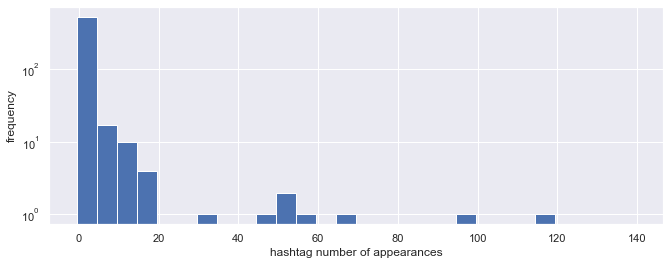

In [56]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [94]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

popular_hashtags_set

{'#BlackLivesMatter',
 '#FlintWaterCrisis',
 '#FoxNews',
 '#JXN',
 '#Jackson',
 '#JacksonMS',
 '#JacksonMSWaterCrisis',
 '#JacksonMississippi',
 '#JacksonWaterCrisis',
 '#JxnNeedsWater',
 '#Mississippi',
 '#SmartNews',
 '#TheReidOut',
 '#VoteOutEveryRepublican',
 '#Water',
 '#WaterCrisis',
 '#failures',
 '#infrastructure',
 '#jxnwater',
 '#jxnwatercrisis',
 '#mississippi',
 '#water',
 '#watercrisis'}

In [58]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


popular_hashtags_list_df
hashtags_list_df

,hashtags,popular_hashtags
0,[#JacksonWaterCrisis],[#JacksonWaterCrisis]
1,[#JacksonWaterCrisis],[#JacksonWaterCrisis]
2,[#jacksonwatercrisis],[]
3,"[#FlintWaterCrisis, #JacksonWaterCrisis]","[#FlintWaterCrisis, #JacksonWaterCrisis]"
4,"[#StatusCoup, #JacksonWaterCrisis]",[#JacksonWaterCrisis]
...,...,...
2777,[#Mississippi],[#Mississippi]
2792,[#soconfused],[]
2795,"[#Jackson, #WaterCrisis, #Infrastructure]","[#Jackson, #WaterCrisis]"
2796,[#QuartersBecauseWeCare],[]


In [59]:
# vectorize the hashtags in each tweet make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

hashtag_vector_df

,popular_hashtags,#jxnwater,#mississippi,#failures,#JXN,#WaterCrisis,#TheReidOut,#Jackson,#Water,#FlintWaterCrisis,...,#JacksonMississippi,#FoxNews,#VoteOutEveryRepublican,#water,#JacksonMS,#JacksonWaterCrisis,#watercrisis,#Mississippi,#infrastructure,#JacksonMSWaterCrisis
0,[#JacksonWaterCrisis],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,[#JacksonWaterCrisis],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,"[#FlintWaterCrisis, #JacksonWaterCrisis]",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,[#JacksonWaterCrisis],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,[#JacksonWaterCrisis],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,[#mississippi],0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2771,[#Mississippi],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2777,[#Mississippi],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2795,"[#Jackson, #WaterCrisis]",0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#  drop the popular_hashtags column from the dataframe.
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

hashtag_matrix

,#jxnwater,#mississippi,#failures,#JXN,#WaterCrisis,#TheReidOut,#Jackson,#Water,#FlintWaterCrisis,#BlackLivesMatter,...,#JacksonMississippi,#FoxNews,#VoteOutEveryRepublican,#water,#JacksonMS,#JacksonWaterCrisis,#watercrisis,#Mississippi,#infrastructure,#JacksonMSWaterCrisis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2795,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


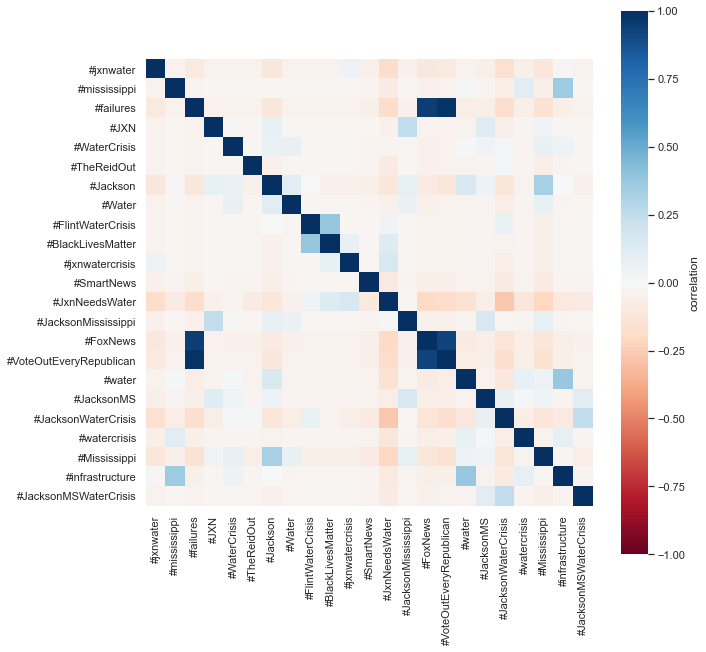

In [61]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [62]:
#Building the correlation matrix for the top words after removing stopwords
tweets_2=pd.read_csv("JWC_alltweets1.csv")
tweets_2

,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month,Clean Tweet
0,2021-05-19 03:03:23+00:00,1.394850e+18,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,5/19/2021,-0.4648,5,water issues in the city again smh jacksonwate...
1,2021-04-24 02:14:03+00:00,1.385780e+18,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,4/24/2021,0.0000,4,jacksonwatercrisis
2,2021-04-21 12:26:37+00:00,1.384850e+18,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,4/21/2021,0.3400,4,anyone with mobile video of the jacksonwatercr...
3,2021-04-07 21:13:26+00:00,1.379910e+18,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,4/7/2021,0.0000,4,flintwatercrisis jacksonwatercrisis
4,2021-03-22 23:57:03+00:00,1.374150e+18,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,3/22/2021,-0.8481,3,jackson mississippi s water crisis is rooted i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2021-03-02 21:29:35+00:00,1.366860e+18,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,3/2/2021,0.5413,3,governor we ll have to have a serious conversa...
2810,2021-02-28 17:40:09+00:00,1.366080e+18,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2/28/2021,-0.2124,2,hindseoc you nincompoops should fix the broke...
2811,2021-02-25 00:17:15+00:00,1.364730e+18,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2/25/2021,0.3584,2,kaylahazel our north been complaining about w...
2812,2021-02-24 13:52:51+00:00,1.364570e+18,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0,2/24/2021,-0.0258,2,jordanrhillman exactly he ll take credit for ...


In [80]:
#Using the list of words after topic modeling from clean tweets with removed stopwords(10 from each 4 topics)
#Also removing words that add do not add much meaning, removing repeated words
myWordset={'week','infrastructure','mayor','help','break','month','racism','pandemic','people','today',
      'tatereeves','ignore','america','infrastructure','flint','race','talk','legislature','fix',
      'week','continue','resident','outage','month','news','struggle','miss','fear',
     'black','need','run','storm','long'}
type(myWordset)


#maybe also add top words from each 4 category that you got from plot- ['governor','government','biden','federal','white','crubmling','system']
#also take into consideration lowercase and lemmatized tex ts



set

In [81]:
tweets_2['word list']=tweets_2['Clean Tweet'].apply(lambda x:str(x).split())
tweets_2

,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month,Clean Tweet,word list,popular_words
0,2021-05-19 03:03:23+00:00,1.394850e+18,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,5/19/2021,-0.4648,5,water issues in the city again smh jacksonwate...,"[water, issues, in, the, city, again, smh, jac...",[]
1,2021-04-24 02:14:03+00:00,1.385780e+18,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,4/24/2021,0.0000,4,jacksonwatercrisis,[jacksonwatercrisis],[]
2,2021-04-21 12:26:37+00:00,1.384850e+18,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,4/21/2021,0.3400,4,anyone with mobile video of the jacksonwatercr...,"[anyone, with, mobile, video, of, the, jackson...",[]
3,2021-04-07 21:13:26+00:00,1.379910e+18,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,4/7/2021,0.0000,4,flintwatercrisis jacksonwatercrisis,"[flintwatercrisis, jacksonwatercrisis]",[]
4,2021-03-22 23:57:03+00:00,1.374150e+18,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,3/22/2021,-0.8481,3,jackson mississippi s water crisis is rooted i...,"[jackson, mississippi, s, water, crisis, is, r...",[racism]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2021-03-02 21:29:35+00:00,1.366860e+18,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,3/2/2021,0.5413,3,governor we ll have to have a serious conversa...,"[governor, we, ll, have, to, have, a, serious,...",[long]
2810,2021-02-28 17:40:09+00:00,1.366080e+18,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2/28/2021,-0.2124,2,hindseoc you nincompoops should fix the broke...,"[hindseoc, you, nincompoops, should, fix, the,...",[fix]
2811,2021-02-25 00:17:15+00:00,1.364730e+18,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2/25/2021,0.3584,2,kaylahazel our north been complaining about w...,"[kaylahazel, our, north, been, complaining, ab...",[]
2812,2021-02-24 13:52:51+00:00,1.364570e+18,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0,2/24/2021,-0.0258,2,jordanrhillman exactly he ll take credit for ...,"[jordanrhillman, exactly, he, ll, take, credit...",[]


In [82]:
# create dataframe where each use of word gets its own row
flattened_words_df = pd.DataFrame(
    [word for words_list in tweets_2['word list']
    for word in words_list],
    columns=['words'])
flattened_words_df

,words
0,water
1,issues
2,in
3,the
4,city
...,...
73526,made
73527,noodles
73528,with
73529,the


In [83]:
flattened_words_df['words'].unique().size

6668

In [84]:
# count of appearances of each word
popular_words = flattened_words_df.groupby('words').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

popular_words

,words,counts
0,water,3432
1,the,3053
2,jackson,2446
3,crisis,1966
4,in,1820
...,...,...
6663,intervention,1
6664,interviewed,1
6665,intoxicated,1
6666,intractable,1


In [85]:
# make a new column with only the word set you created
tweets_2['popular_words'] = tweets_2['word list'].apply(
            lambda word_list: [word for word in word_list
                                  if word in myWordset])
# drop rows without popular words from myWordset
popular_words_list_df = tweets_2.loc[
            tweets_2.popular_words.apply(lambda word_list: word_list !=[])]

In [86]:
tweets_2

,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month,Clean Tweet,word list,popular_words
0,2021-05-19 03:03:23+00:00,1.394850e+18,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,5/19/2021,-0.4648,5,water issues in the city again smh jacksonwate...,"[water, issues, in, the, city, again, smh, jac...",[]
1,2021-04-24 02:14:03+00:00,1.385780e+18,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,4/24/2021,0.0000,4,jacksonwatercrisis,[jacksonwatercrisis],[]
2,2021-04-21 12:26:37+00:00,1.384850e+18,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,4/21/2021,0.3400,4,anyone with mobile video of the jacksonwatercr...,"[anyone, with, mobile, video, of, the, jackson...",[]
3,2021-04-07 21:13:26+00:00,1.379910e+18,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,4/7/2021,0.0000,4,flintwatercrisis jacksonwatercrisis,"[flintwatercrisis, jacksonwatercrisis]",[]
4,2021-03-22 23:57:03+00:00,1.374150e+18,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,3/22/2021,-0.8481,3,jackson mississippi s water crisis is rooted i...,"[jackson, mississippi, s, water, crisis, is, r...",[racism]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2021-03-02 21:29:35+00:00,1.366860e+18,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,3/2/2021,0.5413,3,governor we ll have to have a serious conversa...,"[governor, we, ll, have, to, have, a, serious,...",[long]
2810,2021-02-28 17:40:09+00:00,1.366080e+18,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2/28/2021,-0.2124,2,hindseoc you nincompoops should fix the broke...,"[hindseoc, you, nincompoops, should, fix, the,...",[fix]
2811,2021-02-25 00:17:15+00:00,1.364730e+18,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2/25/2021,0.3584,2,kaylahazel our north been complaining about w...,"[kaylahazel, our, north, been, complaining, ab...",[]
2812,2021-02-24 13:52:51+00:00,1.364570e+18,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0,2/24/2021,-0.0258,2,jordanrhillman exactly he ll take credit for ...,"[jordanrhillman, exactly, he, ll, take, credit...",[]


In [87]:
popular_words_list_df

,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month,Clean Tweet,word list,popular_words
4,2021-03-22 23:57:03+00:00,1.374150e+18,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,3/22/2021,-0.8481,3,jackson mississippi s water crisis is rooted i...,"[jackson, mississippi, s, water, crisis, is, r...",[racism]
6,2021-03-17 23:22:22+00:00,1.372330e+18,@SenHydeSmith why the vague language in the bi...,cindylang17,NaN,0,0,0,0,3/17/2021,0.3182,3,senhydesmith why the vague language in the bi...,"[senhydesmith, why, the, vague, language, in, ...",[help]
7,2021-03-17 21:14:48+00:00,1.372300e+18,They still don’t have clean water from faucets...,ziskacomm,"Washington, DC",0,0,0,0,3/17/2021,0.3527,3,they still don t have clean water from faucets...,"[they, still, don, t, have, clean, water, from...",[people]
9,2021-03-17 15:33:10+00:00,1.372210e+18,This city has participatory budgeting as it ap...,odaraia,Salish Sea,0,0,0,0,3/17/2021,-0.4767,3,this city has participatory budgeting as it ap...,"[this, city, has, participatory, budgeting, as...","[long, infrastructure, pandemic]"
10,2021-03-17 14:53:01+00:00,1.372200e+18,"Access to water is a human right, it’s been 5 ...",reneechatcher,"Chicago, IL",0,7,6,0,3/17/2021,0.4019,3,access to water is a human right it s been we...,"[access, to, water, is, a, human, right, it, s...",[storm]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,2021-02-22 14:01:16+00:00,1.363850e+18,Sooo my job is closed again today due to the w...,blackqueen15_,"Jackson, MS",0,0,0,0,2/22/2021,0.4215,2,sooo my job is closed again today due to the w...,"[sooo, my, job, is, closed, again, today, due,...","[today, outage, week]"
2805,2021-02-17 00:14:27+00:00,1.361830e+18,@D_Ison92 Scattered outages in town. They’ve b...,CharleyDumas,"Prentiss, MS",1,0,0,0,2/17/2021,-0.2411,2,d scattered outages in town they ve been rep...,"[d, scattered, outages, in, town, they, ve, be...",[long]
2808,2021-03-04 20:20:40+00:00,1.367570e+18,"@MeetThePress @HowardAuthor Basically, this wa...",MorganRadford,NYC,1,5,22,2,3/4/2021,-0.6705,3,meetthepress howardauthor basically this was ...,"[meetthepress, howardauthor, basically, this, ...",[infrastructure]
2809,2021-03-02 21:29:35+00:00,1.366860e+18,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,3/2/2021,0.5413,3,governor we ll have to have a serious conversa...,"[governor, we, ll, have, to, have, a, serious,...",[long]


In [88]:
#Now vectorize the popular words

# make new dataframe
words_vector_df = popular_words_list_df.loc[:, ['popular_words']]

for word in myWordset:
    # make columns to encode presence of hashtags
    words_vector_df['{}'.format(word)] = words_vector_df.popular_words.apply(
        lambda word_list: int(word in word_list))


In [89]:
words_vector_df

,popular_words,mayor,infrastructure,fix,help,people,black,long,continue,flint,...,fear,break,run,storm,america,need,talk,ignore,outage,news
4,[racism],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,[help],0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,[people],0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"[long, infrastructure, pandemic]",0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,[storm],0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,"[today, outage, week]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2805,[long],0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2808,[infrastructure],0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2809,[long],0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
hashtag_matrix = words_vector_df.drop('popular_words', axis=1)

# hashtag_matrix.to_csv("words_matrix.csv")
hashtag_matrix

,mayor,infrastructure,fix,help,people,black,long,continue,flint,race,...,fear,break,run,storm,america,need,talk,ignore,outage,news
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2805,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2808,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2809,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#Replacing 0 from matrix to ?
word_matrix=hashtag_matrix.replace(0,'?')

word_matrix.to_csv("words_matrix.csv")
word_matrix

,mayor,infrastructure,fix,help,people,black,long,continue,flint,race,...,fear,break,run,storm,america,need,talk,ignore,outage,news
4,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
6,?,?,?,1,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
7,?,?,?,?,1,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
9,?,1,?,?,?,?,1,?,?,?,...,?,?,?,?,?,?,?,?,?,?
10,?,?,?,?,?,?,?,?,?,?,...,?,?,?,1,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,1,?
2805,?,?,?,?,?,?,1,?,?,?,...,?,?,?,?,?,?,?,?,?,?
2808,?,1,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
2809,?,?,?,?,?,?,1,?,?,?,...,?,?,?,?,?,?,?,?,?,?


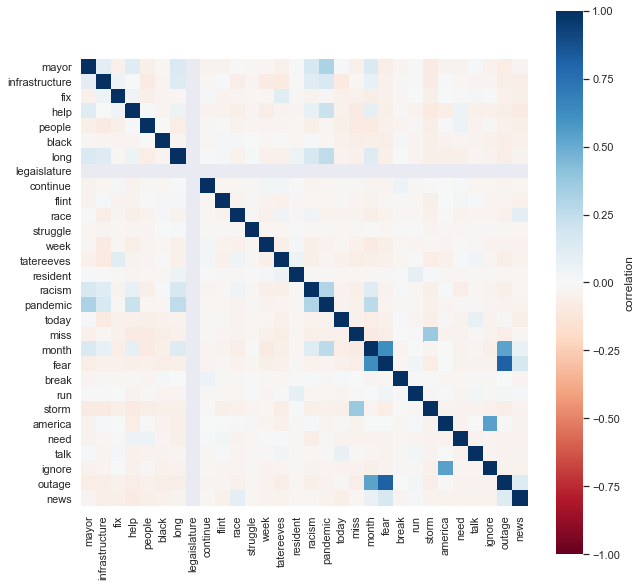

In [75]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [116]:
tweets

,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month,Clean Tweet,mentioned,hashtags,word list
0,2021-05-19 03:03:23+00:00,1.394850e+18,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,5/19/2021,-0.4648,5,water issues in the city again smh jacksonwate...,[],[#JacksonWaterCrisis],"[water, issues, in, the, city, again, smh, jac..."
1,2021-04-24 02:14:03+00:00,1.385780e+18,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,4/24/2021,0.0000,4,jacksonwatercrisis,[],[#JacksonWaterCrisis],[jacksonwatercrisis]
2,2021-04-21 12:26:37+00:00,1.384850e+18,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,4/21/2021,0.3400,4,anyone with mobile video of the jacksonwatercr...,[@cbsnews],[#jacksonwatercrisis],"[anyone, with, mobile, video, of, the, jackson..."
3,2021-04-07 21:13:26+00:00,1.379910e+18,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,4/7/2021,0.0000,4,flintwatercrisis jacksonwatercrisis,[],"[#FlintWaterCrisis, #JacksonWaterCrisis]","[flintwatercrisis, jacksonwatercrisis]"
4,2021-03-22 23:57:03+00:00,1.374150e+18,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,3/22/2021,-0.8481,3,jackson mississippi s water crisis is rooted i...,[@YouTube],"[#StatusCoup, #JacksonWaterCrisis]","[jackson, mississippi, s, water, crisis, is, r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2021-03-02 21:29:35+00:00,1.366860e+18,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,3/2/2021,0.5413,3,governor we ll have to have a serious conversa...,[],[],"[governor, we, ll, have, to, have, a, serious,..."
2810,2021-02-28 17:40:09+00:00,1.366080e+18,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2/28/2021,-0.2124,2,hindseoc you nincompoops should fix the broke...,[@HindsEOC],[],"[hindseoc, you, nincompoops, should, fix, the,..."
2811,2021-02-25 00:17:15+00:00,1.364730e+18,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2/25/2021,0.3584,2,kaylahazel our north been complaining about w...,[@kaylahazel_],[],"[kaylahazel, our, north, been, complaining, ab..."
2812,2021-02-24 13:52:51+00:00,1.364570e+18,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0,2/24/2021,-0.0258,2,jordanrhillman exactly he ll take credit for ...,[@jordanrhillman],[],"[jordanrhillman, exactly, he, ll, take, credit..."


In [153]:
#Analyze co-occurrence and networks of words

import nltk
import itertools
import collections
from nltk import bigrams

tweets['word list']=tweets['Clean Tweet'].apply(lambda x:str(x).split())

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(["https",'t','co','amp','water','Jackson','Mississippi','s','M','city','jackson','mississippi'])

#removing stopwords 
tweets['newWordList'] = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in tweets['word list']]

tweets

terms_bigram=[list(nltk.bigrams(tweet)) for tweet in tweets['newWordList']]

terms_bigram[0]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishabhstha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('issues', 'smh'), ('smh', 'jacksonwatercrisis')]

In [162]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(50)

bigram_df = pd.DataFrame(bigram_counts.most_common(25),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(crisis, continues)",140
1,"(two, weeks)",103
2,"(month, without)",93
3,"(next, outage)",86
4,"(struggling, residents)",84
5,"(residents, fear)",84
6,"(fear, next)",84
7,"(without, struggling)",83
8,"(winter, storm)",74
9,"(ongoing, crisis)",72


In [167]:
terms_trigram=[list(nltk.trigrams(tweet)) for tweet in tweets['newWordList']]
trigrams = list(itertools.chain(*terms_trigram))

# Create counter of words in clean bigrams
trigram_counts = collections.Counter(trigrams)

trigram_counts.most_common(50)

trigram_df = pd.DataFrame(trigram_counts.most_common(25),
                             columns=['trigram', 'count'])

trigram_df

,trigram,count
0,"(struggling, residents, fear)",84
1,"(residents, fear, next)",84
2,"(fear, next, outage)",84
3,"(month, without, struggling)",83
4,"(without, struggling, residents)",83
5,"(crisis, continues, two)",59
6,"(continues, two, weeks)",59
7,"(miss, crisis, continues)",58
8,"(two, weeks, storm)",57
9,"(weeks, storm, foxnews)",52


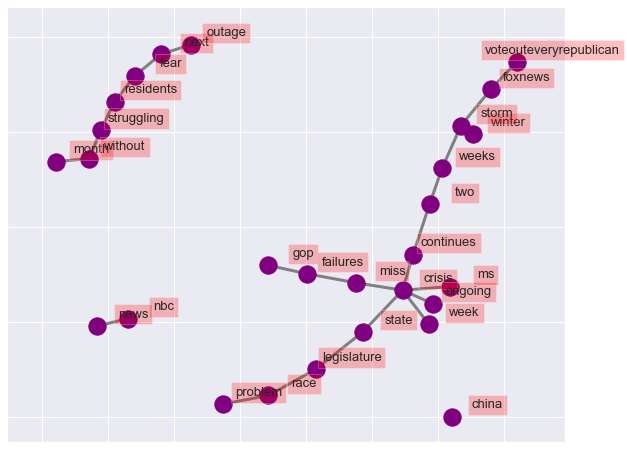

In [163]:
# Visualize networks of bigrams
import networkx as nx

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)


fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

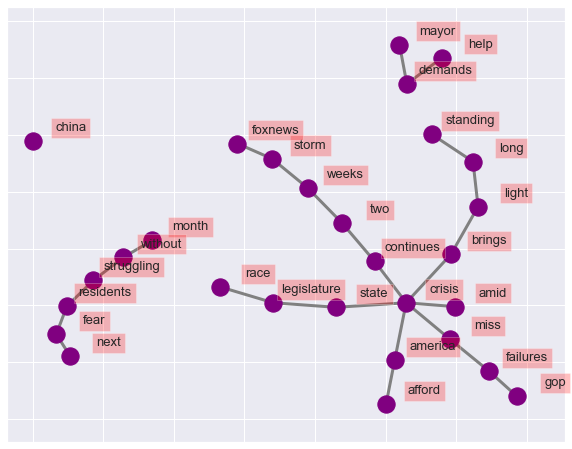

In [168]:
# Visualize networks of trigrams
import networkx as nx

# Create dictionary of bigrams and their counts
d = trigram_df.set_index('trigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)


fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [107]:
#Average compound score by month/week
#check for requent words in past as compared to 2021
#Ratio of negative tweets against all tweets
#Common words in all positive, negative, and compound tweets
#By Location
#Think what else you can do and from research papers